Feature selection

BERT integration

In [34]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install AutoModel

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


distilbert-base-uncased because:
- pre-trained BERT model
- text classification
- distilled BERT model for smaller dataset
- slightly lesser performance than bert-base-uncased
- switch to bert-base-uncased for higher accuracy and if we have more computational resources; it will be slower

maybe not BERT? Any BERT models max text length is 512 and the news texts are longer


In [42]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import torch
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from datasets import Dataset
from transformers import AutoTokenizer # Hugging Face Transformers
from transformers import AutoModel
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [43]:
news_df = pd.read_csv('Data/raw_data/fake_or_real_news.csv') # TODO: Get cleaned data instead
seed=42
label_encoder = preprocessing.LabelEncoder()
news_df['label'] = label_encoder.fit_transform(news_df['label'].tolist())

In [44]:
train_df, test_df = train_test_split(news_df, test_size=0.2)

In [45]:
import torch 
from transformers import AutoTokenizer, AutoModel, AdamW 
import matplotlib.pyplot as plt
# Load the pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english") 
model = AutoModel.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english") # Example news data (replace with your actual dataset) 
inputs = tokenizer(news_df['title'].to_list(), return_tensors='pt', padding=True, truncation=True, max_length=512)
optimizer = AdamW(model.parameters(), lr=1e-5)

# Track accuracies for each epoch
logistic_accuracies = []
knn_accuracies = []

model.train()  # Set the model to training mode
for epoch in range(10):
    optimizer.zero_grad()  # Zero out previous gradients

    # Forward pass: Get model outputs
    with torch.no_grad():  # Since we're extracting embeddings, no need to compute gradients
        outputs = model(**inputs)

    # Extract the CLS token embeddings (usually the first token)
    cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        cls_embeddings, news_df['label'].to_list(), test_size=0.2, random_state=seed
    )

    # Train logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logistic_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}: logistic accuracy = {accuracy:.4f}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        cls_embeddings, 
        news_df['label'].to_list(), 
        test_size=0.2, 
        random_state=seed
    )

    # Initialize the K-Nearest Neighbors classifier
    clf = KNeighborsClassifier(n_neighbors=3)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print("knn accuracy:", accuracy)


c:\Users\rkaya\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1: logistic accuracy = 0.7380
knn accuracy: 0.6456195737963694
Epoch 2: logistic accuracy = 0.7001
knn accuracy: 0.6385161799526441
Epoch 3: logistic accuracy = 0.7269
knn accuracy: 0.659037095501184
Epoch 4: logistic accuracy = 0.7301
knn accuracy: 0.6566692975532754
Epoch 5: logistic accuracy = 0.7032
knn accuracy: 0.6361483820047356
Epoch 6: logistic accuracy = 0.7135
knn accuracy: 0.6566692975532754
Epoch 7: logistic accuracy = 0.7261
knn accuracy: 0.648776637726914
Epoch 8: logistic accuracy = 0.7096
knn accuracy: 0.6345698500394633
Epoch 9: logistic accuracy = 0.7009
knn accuracy: 0.6527229676400947
Epoch 10: logistic accuracy = 0.7332
knn accuracy: 0.6527229676400947


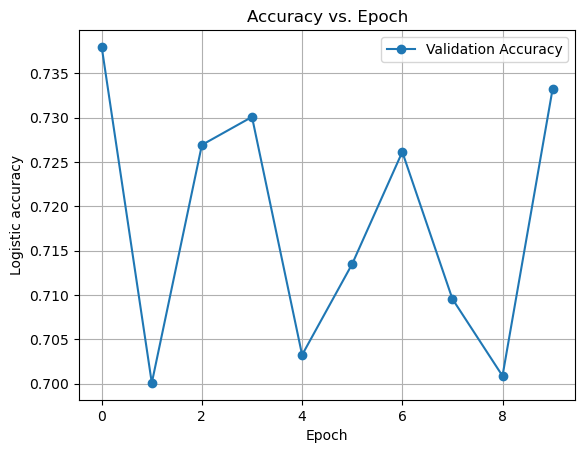

In [46]:
plt.plot(logistic_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Logistic accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.savefig('logistic.png')

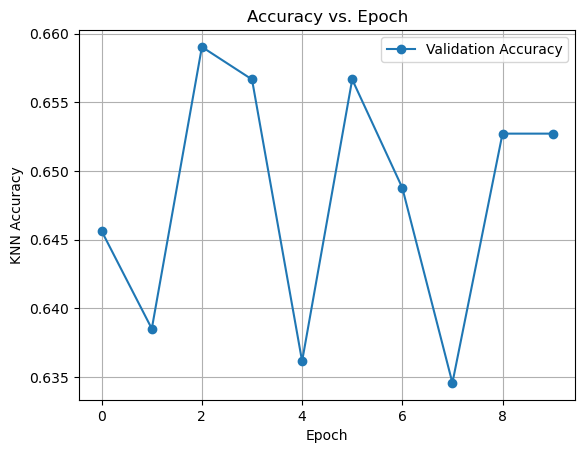

In [47]:
plt.plot(knn_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('KNN Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.savefig('knn.png')

Using logistic regression for classification

In [48]:
X_train, X_test, y_train, y_test = train_test_split(cls_embeddings, news_df['label'].to_list(), test_size=0.2, random_state=seed)

clf = LogisticRegression(max_iter=1000) # TODO: try knn
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7332280978689818


Using KNN-3 for classification

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, 
    news_df['label'].to_list(), 
    test_size=0.2, 
    random_state=seed
)

# Initialize the K-Nearest Neighbors classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6527229676400947
